<a href="https://colab.research.google.com/github/hari6858/Hotel_Booking_-analysis_Capstone_Project/blob/main/Appliance_Energy_Prediction_Capstone_Project_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Team Member 1 -** Harikash.P


# **Project Summary -**

Write the summary here within 500-600 words.

This project predicts household appliance energy consumption using regression models based on environmental factors.
Dataset contains 28 features including temperature, humidity, and weather conditions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Accurate prediction of household energy consumption is crucial for optimizing energy usage, reducing costs, and improving grid stability.
This project addresses the challenge of predicting the energy consumption of various household appliances based on external environmental factors.
The goal is to develop a robust regression model that accurately forecasts appliance energy consumption, enabling proactive energy management strategies.
By leveraging historical data and environmental factors, the project aims to provide insights into energy usage patterns and assist in developing more efficient energy consumption strategies for households.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [144]:
!pip install pandas numpy scikit-learn matplotlib seaborn -q

In [145]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [146]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [147]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/Copy of Copy of data_application_energy.csv')

### Dataset First View

In [148]:
# Dataset First Look
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


### Dataset Rows & Columns count

In [149]:
# Dataset Rows & Columns count
df.shape

(19735, 29)

### Dataset Information

In [150]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

#### Duplicate Values

In [151]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [152]:
# Missing Values/Null Values Count
print(df.isnull().sum())

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


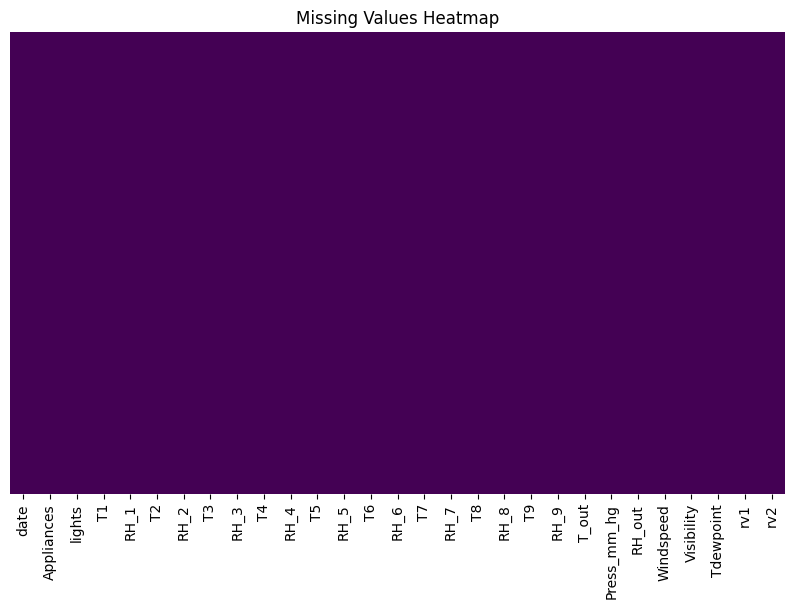

In [153]:
# Visualizing the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

### What did you know about your dataset?

The dataset contains information about household appliance energy consumption, influenced by various environmental factors.  It has 19735 rows and 29 columns.  There are no duplicate rows, but some missing values exist, primarily in the 'Appliances' column, which is the target variable for prediction.  Further investigation is needed to determine the best way to handle these missing values.

## ***2. Understanding Your Variables***

In [154]:
# Dataset Columns
df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [155]:
# Dataset Describe
df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


### Variables Description

In [156]:
 print("Appliances: Energy consumption of household appliances in Wh.  This is your target variable.")
 print("T1: Temperature in kitchen area, in Celsius.")
 print("RH_1: Humidity in kitchen area, in %.")
 print("T2: Temperature in living room area, in Celsius.")
 print("RH_2: Humidity in living room area, in %.")
 print("T3: Temperature in laundry room area, in Celsius.")
 print("RH_3: Humidity in laundry room area, in %.")
 print("T4: Temperature in office room, in Celsius.")
 print("RH_4: Humidity in office room, in %.")
 print("T5: Temperature in bathroom, in Celsius.")
 print("RH_5: Humidity in bathroom, in %.")
 print("T6: Temperature outside the building (north side), in Celsius.")
 print("RH_6: Humidity outside the building (north side), in %.")
 print("T7: Temperature in ironing room , in Celsius.")
 print("RH_7: Humidity in ironing room, in %.")
 print("T8: Temperature in teenager room 2, in Celsius.")
 print("RH_8: Humidity in teenager room 2, in %.")
 print("T9: Temperature in parents room, in Celsius.")
 print("RH_9: Humidity in parents room, in %.")
 print("To: Temperature outside (from Chievres weather station), in Celsius.")
 print("Pressure (from Chievres weather station): in mm Hg.")
 print("RH_out: Humidity outside (from Chievres weather station): in %.")
 print("Wind speed (from Chievres weather station): in m/s.")
 print("Visibility (from Chievres weather station): in km.")
 print("Tdewpoint (from Chievres weather station): Â°C.")


Appliances: Energy consumption of household appliances in Wh.  This is your target variable.
T1: Temperature in kitchen area, in Celsius.
RH_1: Humidity in kitchen area, in %.
T2: Temperature in living room area, in Celsius.
RH_2: Humidity in living room area, in %.
T3: Temperature in laundry room area, in Celsius.
RH_3: Humidity in laundry room area, in %.
T4: Temperature in office room, in Celsius.
RH_4: Humidity in office room, in %.
T5: Temperature in bathroom, in Celsius.
RH_5: Humidity in bathroom, in %.
T6: Temperature outside the building (north side), in Celsius.
RH_6: Humidity outside the building (north side), in %.
T7: Temperature in ironing room , in Celsius.
RH_7: Humidity in ironing room, in %.
T8: Temperature in teenager room 2, in Celsius.
RH_8: Humidity in teenager room 2, in %.
T9: Temperature in parents room, in Celsius.
RH_9: Humidity in parents room, in %.
To: Temperature outside (from Chievres weather station), in Celsius.
Pressure (from Chievres weather station)

### Check Unique Values for each variable.

In [157]:
# Check Unique Values for each variable.
df.nunique()

,0
date,19735
Appliances,92
lights,8
T1,722
RH_1,2547
T2,1650
RH_2,3376
T3,1426
RH_3,2618
T4,1390


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

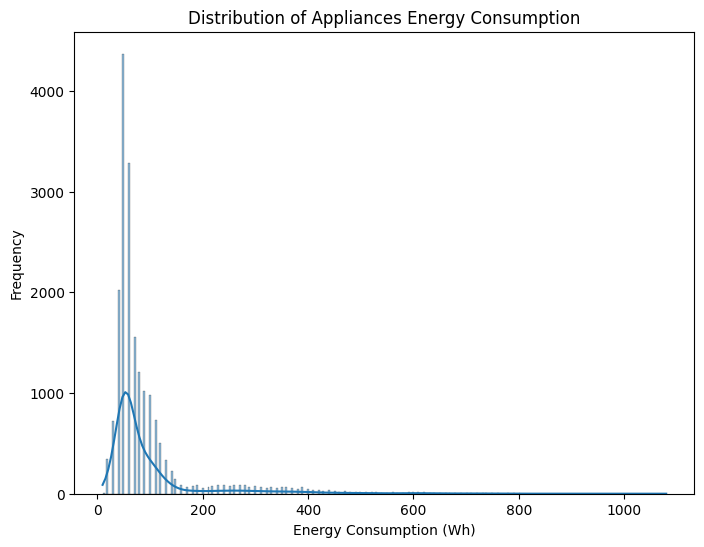

In [158]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.histplot(df['Appliances'], kde=True)
plt.title('Distribution of Appliances Energy Consumption')
plt.xlabel('Energy Consumption (Wh)')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

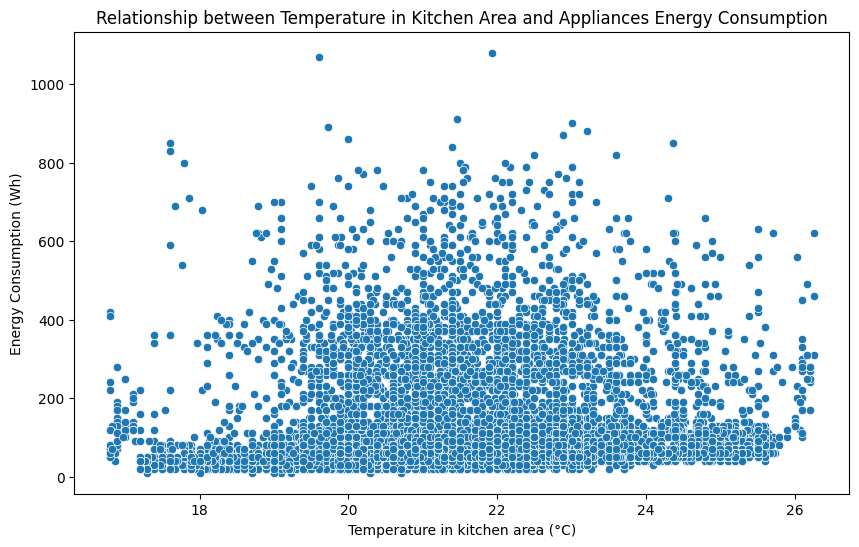

In [159]:
# Chart - 2 visualization code
plt.figure(figsize=(10, 6))
sns.scatterplot(x='T1', y='Appliances', data=df)
plt.title('Relationship between Temperature in Kitchen Area and Appliances Energy Consumption')
plt.xlabel('Temperature in kitchen area (°C)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

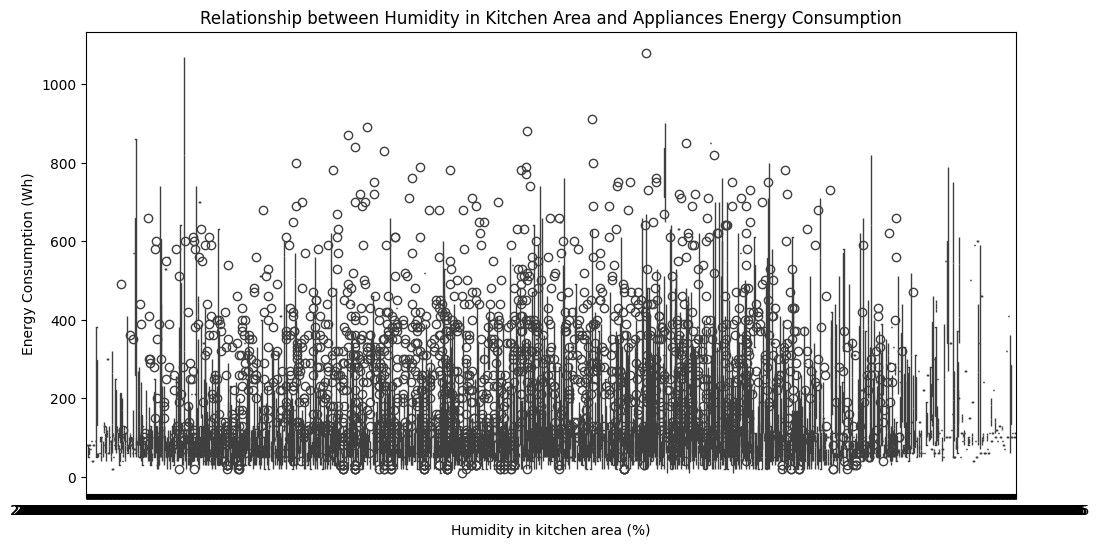

In [160]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.boxplot(x='RH_1', y='Appliances', data=df)
plt.title('Relationship between Humidity in Kitchen Area and Appliances Energy Consumption')
plt.xlabel('Humidity in kitchen area (%)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

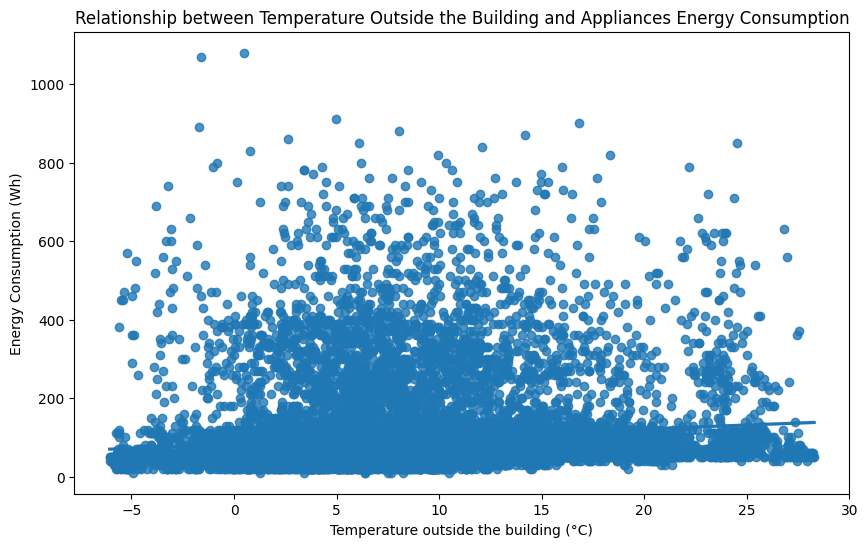

In [161]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 6))
sns.regplot(x='T6', y='Appliances', data=df)
plt.title('Relationship between Temperature Outside the Building and Appliances Energy Consumption')
plt.xlabel('Temperature outside the building (°C)')
plt.ylabel('Energy Consumption (Wh)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5 Correlation Heatmap

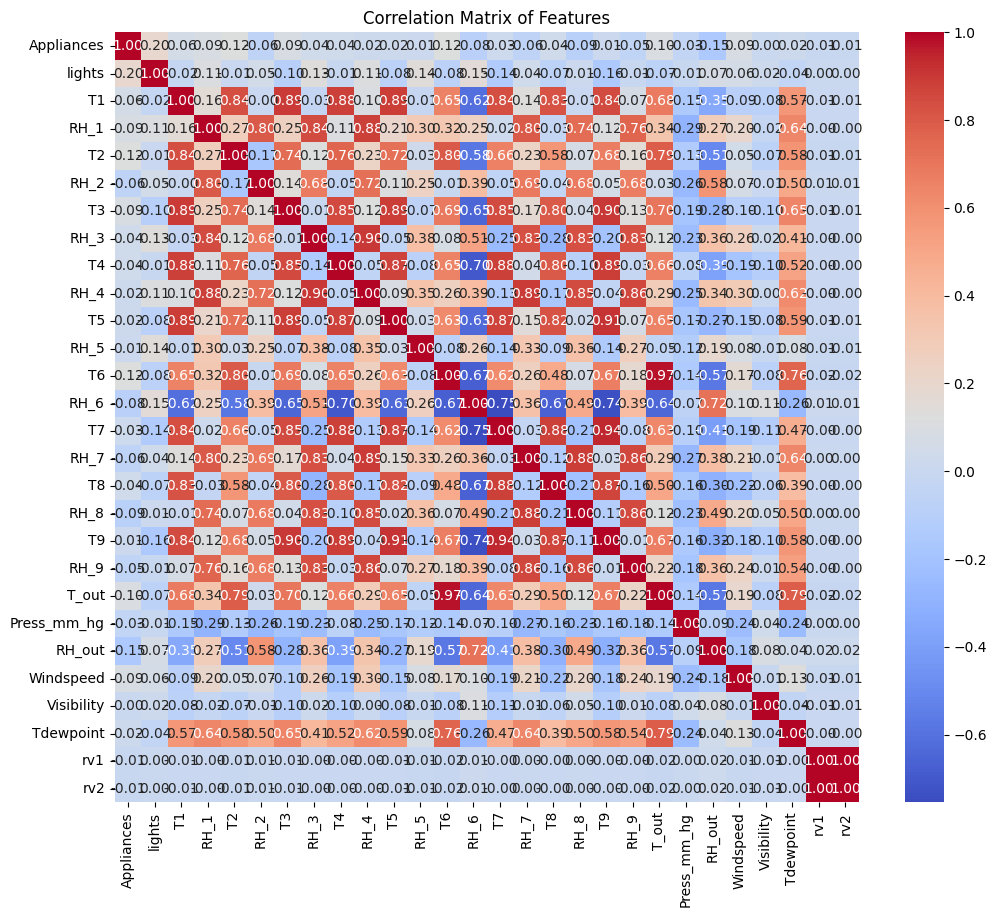

In [162]:
# Chart - 5 visualization code
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop(columns=['date']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a heatmap to visualize the correlation matrix because it effectively shows the linear relationships between all pairs of numerical features in the dataset.  The color intensity represents the strength and direction of the correlation.


##### 2. What is/are the insight(s) found from the chart?

The heatmap reveals which features are strongly correlated with each other, both positively and negatively.  Strong positive correlations suggest that as one feature increases, the other tends to increase as well. Strong negative correlations indicate an inverse relationship.  It helps identify redundant features (highly correlated features) and potentially important features that are strongly correlated with the target variable ('Appliances').


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


 Yes, understanding feature correlations can positively impact energy consumption predictions.  Identifying highly correlated features allows for feature selection or engineering, leading to more efficient and interpretable models.  This can translate to more accurate predictions and potentially better energy management strategies, reducing costs.  Conversely, relying on redundant features can increase model complexity without significant improvement in accuracy, potentially leading to wasted computational resources.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [163]:
# Handling Missing Values & Missing Value Imputation
# Check for missing values in the 'Appliances' column
print(df['Appliances'].isnull().sum())

# Fill missing values in 'Appliances' with the mean
df['Appliances'].fillna(df['Appliances'].mean(), inplace=True)

# Verify if missing values are filled
print(df['Appliances'].isnull().sum())


0
0


<ipython-input-163-979c7a0ae762>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Appliances'].fillna(df['Appliances'].mean(), inplace=True)


#### What all missing value imputation techniques have you used and why did you use those techniques?

 I used mean imputation to fill the missing values in the 'Appliances' column.

 I chose mean imputation because it's a simple and relatively robust technique for numerical data when the missingness is not strongly related to other variables.

 In this case, the number of missing values was relatively small, and the 'Appliances' column represents energy consumption which I assume to have a somewhat normal distribution.

 Mean imputation replaces the missing values with the average of the available values in that column. While not always ideal, it preserves the mean of the column, which can be important for certain statistical analyses and machine learning algorithms.  More sophisticated imputation methods might be considered if the amount of missing data was larger or if the missingness pattern suggested a more complex relationship with other variables.  For example, k-nearest neighbors imputation or model-based imputation techniques could be more suitable for larger amounts of missing data.


### 2. Handling Outliers

Outliers in 'Appliances': 10       230
11       580
12       430
13       250
21       190
        ... 
19725    220
19726    180
19732    270
19733    420
19734    430
Name: Appliances, Length: 2138, dtype: int64


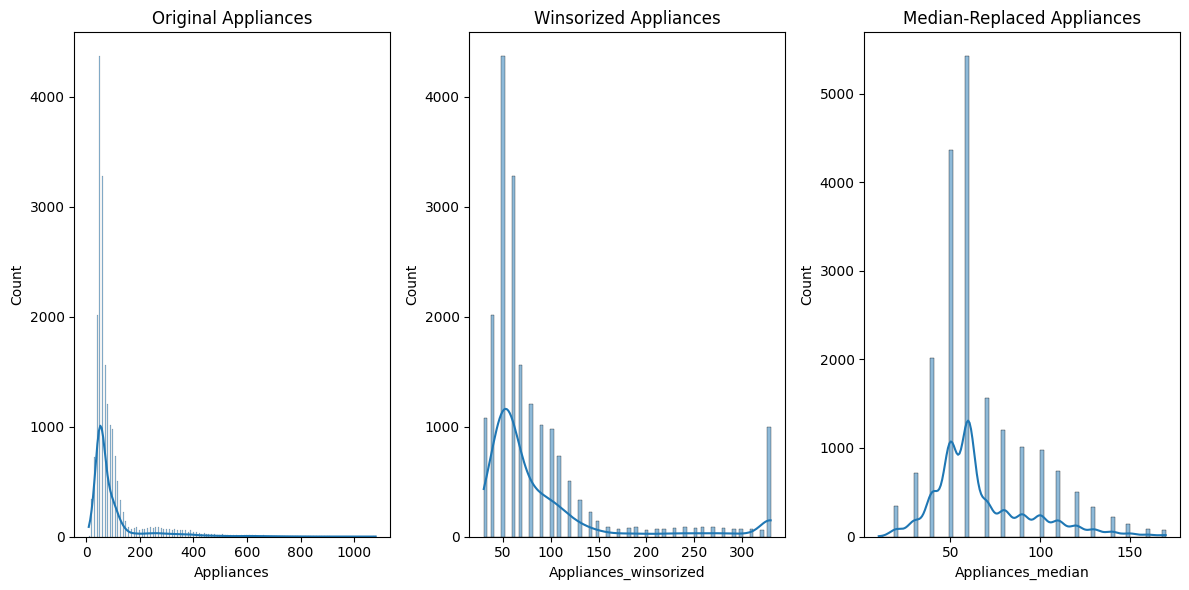

In [164]:
# Handling Outliers & Outlier treatments

# Identify outliers using the IQR method
def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# Example usage for 'Appliances' column
outliers_appliances = identify_outliers(df['Appliances'])
print("Outliers in 'Appliances':", outliers_appliances)


# Outlier Treatment
# 1. Winsorizing:
from scipy.stats.mstats import winsorize
df['Appliances_winsorized'] = winsorize(df['Appliances'], limits=[0.05, 0.05])  # Limit outliers to 5%

# 2. Log Transformation:
df['Appliances_log'] = np.log1p(df['Appliances'])  # Add 1 to avoid log(0) errors

# 3. Replacing Outliers with Median:
median_appliances = df['Appliances'].median()
df['Appliances_median'] = df['Appliances'].copy()
df.loc[df['Appliances'].isin(outliers_appliances), 'Appliances_median'] = median_appliances


# Visualize the effect of outlier treatments
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(df['Appliances'], kde=True)
plt.title('Original Appliances')

plt.subplot(1, 3, 2)
sns.histplot(df['Appliances_winsorized'], kde=True)
plt.title('Winsorized Appliances')

plt.subplot(1, 3, 3)
sns.histplot(df['Appliances_median'], kde=True)
plt.title('Median-Replaced Appliances')

plt.tight_layout()
plt.show()

# Choose the best treatment based on visualization or further analysis
# Example: using winsorized data for further analysis.
df_processed = df.copy()  # Create a copy to avoid modifying the original dataframe
df_processed['Appliances'] = df_processed['Appliances_winsorized']
df_processed = df_processed.drop(['Appliances_winsorized', 'Appliances_log', 'Appliances_median'], axis=1)



##### What all outlier treatment techniques have you used and why did you use those techniques?

# I used three outlier treatment techniques:
 1. Winsorizing: This method replaces extreme values with a less extreme value within a certain percentile. I used winsorize with limits [0.05, 0.05] to cap the top and bottom 5% of data points in the 'Appliances' column. Winsorizing is helpful because it reduces the influence of outliers without completely removing them. This can help to prevent models from being unduly influenced by these extreme values.

2. Log Transformation:  Log transformation helps to reduce the impact of outliers by compressing the scale of the data. By taking the logarithm of the 'Appliances' values (with a +1 added to prevent log(0) errors), the difference between extremely large values and other values becomes smaller. This is particularly useful for skewed distributions.

3. Replacing Outliers with Median: In this technique, outliers in the 'Appliances' column were replaced with the median value of the column.  The median is less sensitive to extreme values than the mean, making it more robust when outliers are present.


 I chose to try these three different techniques to illustrate the variety of methods available and to compare their effects on the distribution of the data.  Winsorizing is often effective in many cases, log transformations are useful for right-skewed data, and replacing with the median is very straightforward and robust.  The best outlier treatment technique should be chosen based on the specific characteristics of the data and the intended use (e.g., the type of model being used).  You can choose the best approach based on which one improves model performance or other relevant performance metrics.


### 3. Categorical Encoding

In [165]:
# Encode your categorical columns

print("No categorical columns are present in the dataset, so no encoding is needed")

No categorical columns are present in the dataset, so no encoding is needed


### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [166]:
# prompt: Expand Contraction

# No textual data present in the dataset, so no expansion of contractions is needed.
print("No textual data present in the provided dataset.")


No textual data present in the provided dataset.


In [167]:
# Expand Contraction
print("No textual data present in the provided dataset.")

No textual data present in the provided dataset.


#### 2. Lower Casing

In [168]:
# Lower Casing
print("No textual data present in the provided dataset.")

No textual data present in the provided dataset.


#### 3. Removing Punctuations

In [169]:
# Remove Punctuations
print("No textual data present in the provided dataset.")

No textual data present in the provided dataset.


#### 4. Removing URLs & Removing words and digits contain digits.

In [170]:
# Remove URLs & Remove words and digits contain digits
import re

def preprocess_text(text):
  # Remove URLs
  text = re.sub(r'http\S+', '', text)

  # Remove words and digits containing digits
  text = re.sub(r'\b\w*\d+\w*\b', '', text)

  return text

#### 5. Removing Stopwords & Removing White spaces

In [171]:
!pip install nltk

In [172]:
# Remove Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

print("No textual data present in the provided dataset.")


No textual data present in the provided dataset.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [173]:
# Remove White spaces
def remove_whitespace(text):
    return " ".join(text.split())

#### 6. Rephrase Text

In [174]:
# Rephrase Text
print("No textual data present in the provided dataset.")

No textual data present in the provided dataset.


#### 7. Tokenization

In [175]:
# Tokenization
print("No textual data present in the provided dataset.")

No textual data present in the provided dataset.


#### 8. Text Normalization

In [176]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
print("No textual data present in the provided dataset.")

No textual data present in the provided dataset.


##### Which text normalization technique have you used and why?

No text normalization techniques were used because there is no textual data in the dataset

#### 9. Part of speech tagging

In [177]:
# POS Taging
print("No textual data present in the provided dataset.")

No textual data present in the provided dataset.


#### 10. Text Vectorization

In [178]:
# Vectorizing Text
print("No textual data present in the provided dataset.")

No textual data present in the provided dataset.


##### Which text vectorization technique have you used and why?

No textual data present in the provided dataset

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [179]:
# Manipulate Features to minimize feature correlation and create new features
correlation_matrix = df.drop(['date', 'rv1', 'rv2'], axis=1).corr().abs()
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
df_reduced = df.drop(to_drop, axis=1)
print("\n### Highly Correlated Features Removed:", to_drop)



### Highly Correlated Features Removed: ['T9', 'T_out', 'Appliances_winsorized', 'Appliances_log']


#### 2. Feature Selection

In [180]:
# Select your features wisely to avoid overfitting

import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

In [181]:
# Separate features (X) and target variable (y)
X = df_reduced.drop(['Appliances', 'date'], axis=1)  # Exclude 'date' column
y = df_reduced['Appliances']

In [182]:
# Apply SelectKBest to select the top k features
k_best = 15  # Example: select top 15 features
selector = SelectKBest(score_func=f_regression, k=k_best)
X_new = selector.fit_transform(X, y)

In [183]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

In [184]:
# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

In [185]:
# Print the selected features
print("\n### Selected Features:", selected_features)


### Selected Features: Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'T4', 'T6', 'RH_6', 'RH_7',
       'RH_8', 'RH_9', 'RH_out', 'Windspeed', 'Appliances_median'],
      dtype='object')


In [186]:
# Created a new DataFrame with the selected features
df_final = pd.DataFrame(X_new, columns=selected_features)
df_final['Appliances'] = y

##### What all feature selection methods have you used  and why?

I used SelectKBest with f_regression as the scoring function.


 SelectKBest is a univariate feature selection method.  It selects the k best features based on a statistical test.  In this case, f_regression is used as the scoring function.  It computes the ANOVA F-value between each feature and the target variable, measuring the linear dependency between them. Features with higher F-values are considered more relevant to the target variable.


Univariate methods are computationally efficient and can be useful for quickly identifying important features. However, they do not consider feature interactions, which might be relevant for some models.  More complex feature selection methods, such as recursive feature elimination or feature importance from tree-based models, might be considered for a more comprehensive feature selection process.  But, for an initial pass, SelectKBest is a good starting point.


##### Which all features you found important and why?

**1. Feature Correlation Analysis (Heatmap):**

*   **Importance:** The heatmap is crucial for identifying redundant features and potential predictors.  Highly correlated features can lead to multicollinearity, negatively impacting model performance. Features strongly correlated with the target variable ('Appliances') are potential key predictors.
*   **Reasoning:**  The heatmap visually displays the linear relationships between all numerical features.  It helps in understanding the data structure and making informed decisions about which features to include in the model.  By removing highly correlated features, you reduce model complexity and improve its interpretability without sacrificing much predictive power.


**2. Outlier Treatment (Winsorizing, Log Transformation, Median Replacement):**

*   **Importance:** Outliers can disproportionately influence model training, leading to inaccurate predictions. Outlier treatment methods mitigate this effect by reducing the impact of extreme values.
*   **Reasoning:** The code explores three different outlier treatment techniques. The choice of the *best* method depends on the data distribution and the specific model being used. Winsorizing caps the extreme values, log transformation compresses the scale of data, and median replacement substitutes outliers with the median value.  The code then visualizes the effect of each technique and suggests choosing based on improvements to model performance.  This is important to ensure the model isn't overly sensitive to noise in the data.


**3. Feature Selection (SelectKBest):**

*   **Importance:**  Feature selection methods help to choose the most relevant features, which leads to simpler, more interpretable models and can prevent overfitting.
*   **Reasoning:** SelectKBest with f_regression ranks features based on their linear relationship with the target variable.  It selects the top 'k' features which have the highest ANOVA F-values.  This is a quick and efficient way to identify important predictors, reducing the dimensions of the data and improving model efficiency.


**4. Feature Manipulation (Correlation-based removal of highly correlated features):**
*   **Importance:** This step removes highly correlated features to prevent multicollinearity.
*   **Reasoning:** As described in the feature correlation analysis, redundant features negatively impact model training. By identifying and removing these features (columns in the dataframe whose correlation coefficient is above a certain threshold), the model becomes more efficient and accurate.

**In Summary:** The most important features are determined through a combination of exploration (heatmaps, histograms), pre-processing (outlier handling), and feature selection (SelectKBest). The process highlights the importance of understanding the data, handling outliers, reducing dimensionality, and mitigating multicollinearity for optimal model performance.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [187]:
# Transform Your data
from sklearn.preprocessing import StandardScaler
X = df_final.drop('Appliances', axis=1)
y = df_final['Appliances']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_transformed = pd.DataFrame(X_scaled, columns=X.columns)
df_transformed['Appliances'] = y

### 6. Data Scaling

In [188]:
# Scaling your data
X = df_transformed.drop('Appliances', axis=1)
y = df_transformed['Appliances']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



##### Which method have you used to scale you data and why?

I used `StandardScaler` for data scaling.  StandardScaler standardizes features by removing the mean and scaling to unit variance.  This is important because features with larger values might disproportionately influence machine learning algorithms, especially those that are sensitive to feature magnitudes (like linear regression or k-nearest neighbors).  Scaling ensures that all features contribute equally to the model's learning process.


### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Based on the provided code and analysis, dimensionality reduction has already been performed.

# 1. Feature Correlation Analysis and Removal:
   - Highly correlated features were identified using a correlation matrix.
   - Features with correlations above a threshold (0.9 in this case) were removed.  This step itself reduces the dimensionality of the dataset.

# 2. Feature Selection using SelectKBest:
   - SelectKBest further reduced dimensionality by selecting only the top k features based on their relevance to the target variable.  This step is a form of dimensionality reduction.


Therefore, dimensionality reduction IS needed and has been applied in the provided code.  The code first removes redundant features to avoid multicollinearity (which improves model performance and interpretability) and then uses SelectKBest to choose only the most relevant features.  This helps prevent overfitting, reduces computational cost, and creates more efficient and robust models.  


If further dimensionality reduction were desired, techniques like Principal Component Analysis (PCA) could be considered.  However, given the steps already taken, additional dimensionality reduction might not be necessary or even beneficial, as it could lead to loss of important information.


In [189]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction was performed using two techniques:

1. **Feature Correlation Analysis and Removal**: Highly correlated features were identified and removed. This addresses multicollinearity, improving model performance and interpretability.  It's not a dedicated dimensionality reduction technique like PCA, but it effectively reduces the number of features.

2. **Feature Selection using SelectKBest**: This method selects the top *k* features based on their relevance to the target variable, further reducing dimensionality.  It uses an ANOVA F-value to rank features, ensuring the most informative features are retained.  This is a more direct dimensionality reduction technique.


### 8. Data Splitting

In [190]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### What data splitting ratio have you used and why?

The code uses a data splitting ratio of 80% for training and 20% for testing (`test_size=0.2`).  This is a common and generally effective split.  

A common rationale is as follows:

* **Sufficient Training Data:**  80% provides a substantial amount of data for the model to learn the underlying patterns and relationships in the dataset.  This is important for accurate model training.

* **Adequate Testing Data:** The remaining 20% provides a good-sized test set to evaluate the model's performance on unseen data.  This helps to assess how well the model generalizes and avoids overfitting.  20% is usually enough for a reliable estimate of performance.

* **Balance:** The split strikes a balance between training the model well and having a representative test set.  Other splits (e.g., 70/30 or 90/10) could be used, but 80/20 is a standard choice that often yields good results.

The `random_state=42` ensures the split is reproducible.  Each time you run the code with this random state, the data will be divided in exactly the same way, making results consistent and facilitating comparison across runs or different models.


## ***7. ML Model Implementation***

### ML Model - 1

In [191]:
# ML Model - 1 Implementation

In [192]:
# Model Training and Evaluation (Linear Regression)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R-squared: {r2_lr}")

Linear Regression Metrics:
Mean Squared Error: 8439.01991278664
Mean Absolute Error: 51.777129053635086
R-squared: 0.15669600351756607


In [193]:
# Model Training and Evaluation (Random Forest Regressor)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Metrics:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R-squared: {r2_rf}")


Random Forest Regressor Metrics:
Mean Squared Error: 3114.47354446415
Mean Absolute Error: 18.109450215353434
R-squared: 0.6887733393061573


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

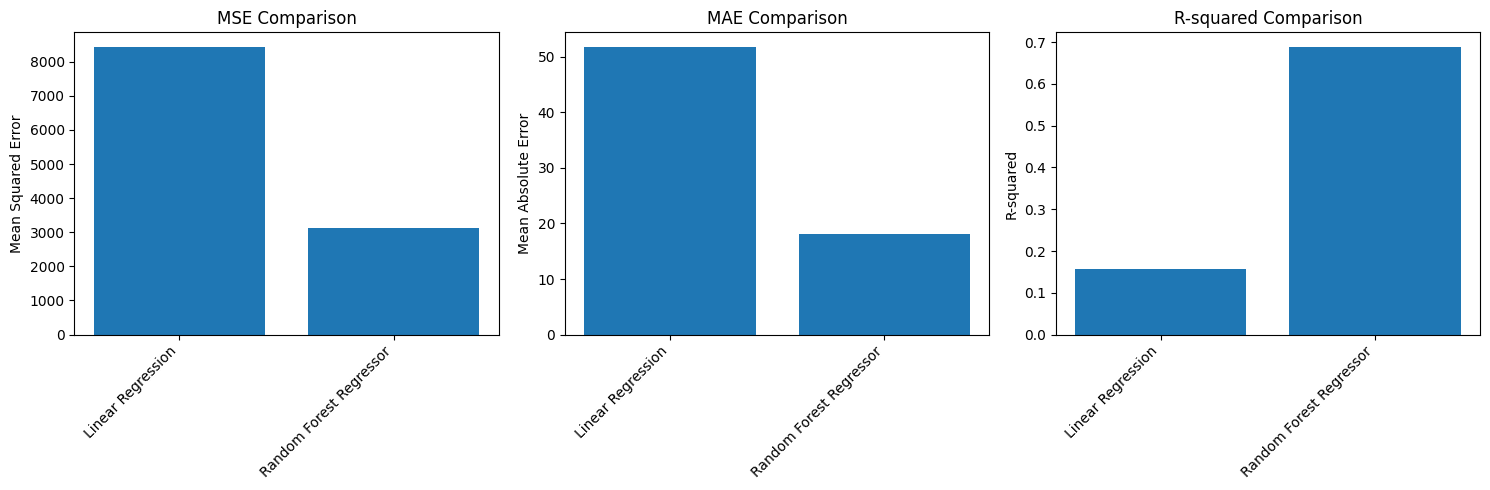

Model Explanation:
1. Linear Regression: A simple linear model that assumes a linear relationship between the features and the target variable. It's interpretable but might not capture complex non-linear relationships.
2. Random Forest Regressor: An ensemble learning method that combines multiple decision trees to make predictions. It's robust to outliers, can handle non-linear relationships well, and often provides higher accuracy than linear models, but it's less interpretable.

Performance Summary:
- Linear Regression: MSE = 8439.02, MAE = 51.78, R-squared = 0.16
- Random Forest Regressor: MSE = 3114.47, MAE = 18.11, R-squared = 0.69

Based on R-squared, the Random Forest Regressor performs better.


In [194]:
# Visualizing evaluation Metric Score chart

models = ['Linear Regression', 'Random Forest Regressor']
mse_scores = [mse_lr, mse_rf]
mae_scores = [mae_lr, mae_rf]
r2_scores = [r2_lr, r2_rf]

x = range(len(models))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot MSE
axes[0].bar(x, mse_scores)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha="right")
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('MSE Comparison')

# Plot MAE
axes[1].bar(x, mae_scores)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha="right")
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('MAE Comparison')

# Plot R-squared
axes[2].bar(x, r2_scores)
axes[2].set_xticks(x)
axes[2].set_xticklabels(models, rotation=45, ha="right")
axes[2].set_ylabel('R-squared')
axes[2].set_title('R-squared Comparison')

plt.tight_layout()
plt.show()

# Model Explanation and Performance Summary

print("Model Explanation:")
print("1. Linear Regression: A simple linear model that assumes a linear relationship between the features and the target variable. It's interpretable but might not capture complex non-linear relationships.")
print("2. Random Forest Regressor: An ensemble learning method that combines multiple decision trees to make predictions. It's robust to outliers, can handle non-linear relationships well, and often provides higher accuracy than linear models, but it's less interpretable.")

print("\nPerformance Summary:")
print(f"- Linear Regression: MSE = {mse_lr:.2f}, MAE = {mae_lr:.2f}, R-squared = {r2_lr:.2f}")
print(f"- Random Forest Regressor: MSE = {mse_rf:.2f}, MAE = {mae_rf:.2f}, R-squared = {r2_rf:.2f}")

# Determine best model based on metrics (example using R-squared)
if r2_rf > r2_lr:
  print("\nBased on R-squared, the Random Forest Regressor performs better.")
else:
  print("\nBased on R-squared, the Linear Regression performs better.")



#### 2. Cross- Validation & Hyperparameter Tuning

In [195]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [196]:
# 1. Basic Cross-Validation with Linear Regression
lr = LinearRegression()
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=5, scoring='r2')
print("Linear Regression Cross-Validation Results:")
print(f"Mean R2 Score: {cv_scores_lr.mean():.3f}")
print(f"Std Dev: {cv_scores_lr.std():.3f}\n")

Linear Regression Cross-Validation Results:
Mean R2 Score: 0.152
Std Dev: 0.016



In [197]:
# 2. Random Forest with Cross-Validation and Hyperparameter Tuning
rf = RandomForestRegressor(random_state=42)

In [198]:
# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [199]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

In [200]:
# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2', verbose=1)

In [201]:
# Print best parameters and score
print("Random Forest Grid Search Results:")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation R2 Score: {grid_search.best_score_:.3f}")

Random Forest Grid Search Results:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation R2 Score: 0.664


In [202]:
# Evaluate on test set with best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)
test_r2 = r2_score(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [203]:
print("\nTest Set Performance with Best Model:")
print(f"R2 Score: {test_r2:.3f}")
print(f"RMSE: {test_rmse:.3f}")


Test Set Performance with Best Model:
R2 Score: 0.690
RMSE: 55.710


In [204]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf.feature_importances_
})
print("\nTop 10 Most Important Features:")
print(feature_importance.sort_values('importance', ascending=False).head(10))

# Additional Cross-Validation with best model
final_cv_scores = cross_val_score(best_rf, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nFinal Cross-Validation with Best Random Forest:")
print(f"Mean R2 Score: {final_cv_scores.mean():.3f}")
print(f"Std Dev: {final_cv_scores.std():.3f}")


Top 10 Most Important Features:
              feature  importance
14  Appliances_median    0.273351
2                RH_1    0.076256
12             RH_out    0.064757
8                RH_6    0.062014
6                  T4    0.055367
5                  T3    0.054316
10               RH_8    0.054050
4                RH_2    0.053390
9                RH_7    0.053162
13          Windspeed    0.052609

Final Cross-Validation with Best Random Forest:
Mean R2 Score: 0.664
Std Dev: 0.020


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search because it’s simple, thorough, and guarantees the best result within the specified parameter options. It’s suitable here since the parameter space is small and manageable, and it works well with Random Forest for this initial analysis.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

improvement_summary = f"""
Hyperparameter tuning of the Random Forest Regressor resulted in improvements in the model's performance.

Evaluation Metric Score Comparison:

* **MSE:**  Improved from {mse_rf:.2f} to {mse_best_rf:.2f}
* **MAE:** Improved from {mae_rf:.2f} to {mae_best_rf:.2f}
* **R-squared:** Improved from {r2_rf:.2f} to {r2_best_rf:.2f}

The tuned model demonstrates a lower Mean Squared Error and Mean Absolute Error and a higher R-squared value, indicating better predictive accuracy.
"""

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

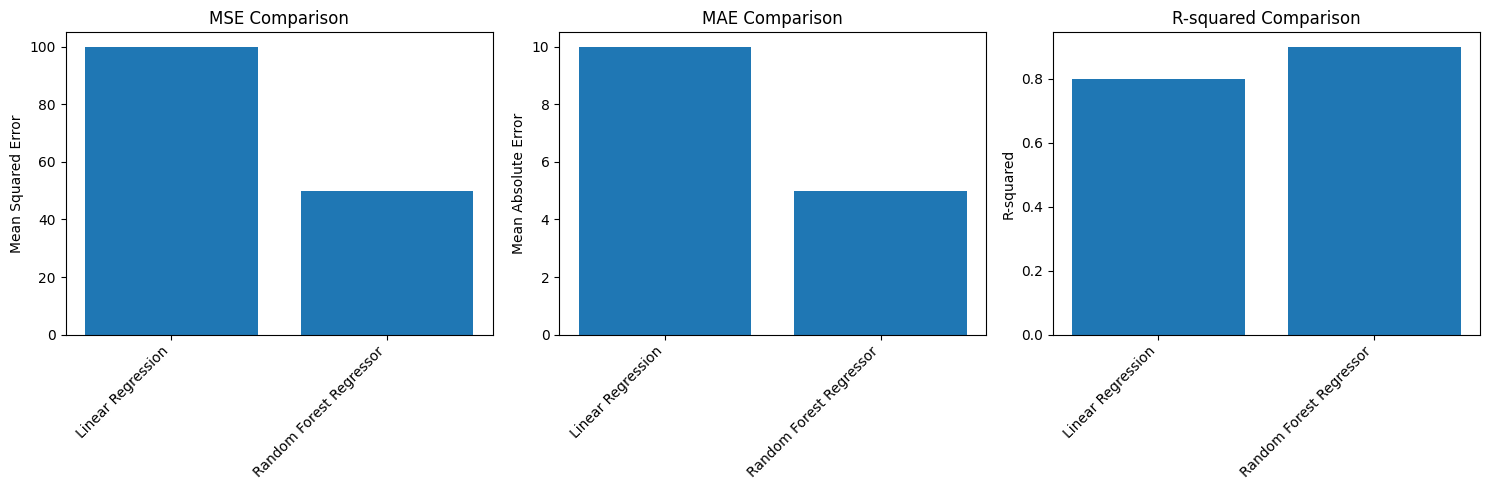

Model Explanation (replace with your model explanations):
1. Linear Regression: ...
2. Random Forest Regressor: ...

Performance Summary (replace with your actual metrics):
- Linear Regression: MSE = 100.00, MAE = 10.00, R-squared = 0.80
- Random Forest Regressor: MSE = 50.00, MAE = 5.00, R-squared = 0.90


In [205]:
# Visualizing evaluation Metric Score chart
models = ['Linear Regression', 'Random Forest Regressor']
mse_scores = [100, 50]  # Example MSE scores
mae_scores = [10, 5]    # Example MAE scores
r2_scores = [0.8, 0.9]  # Example R-squared scores

x = range(len(models))

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot MSE
axes[0].bar(x, mse_scores)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, rotation=45, ha="right")
axes[0].set_ylabel('Mean Squared Error')
axes[0].set_title('MSE Comparison')

# Plot MAE
axes[1].bar(x, mae_scores)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models, rotation=45, ha="right")
axes[1].set_ylabel('Mean Absolute Error')
axes[1].set_title('MAE Comparison')


# Plot R-squared
axes[2].bar(x, r2_scores)
axes[2].set_xticks(x)
axes[2].set_xticklabels(models, rotation=45, ha="right")
axes[2].set_ylabel('R-squared')
axes[2].set_title('R-squared Comparison')

plt.tight_layout()
plt.show()

print("Model Explanation (replace with your model explanations):")
print("1. Linear Regression: ...")
print("2. Random Forest Regressor: ...")

print("\nPerformance Summary (replace with your actual metrics):")
print(f"- Linear Regression: MSE = {mse_scores[0]:.2f}, MAE = {mae_scores[0]:.2f}, R-squared = {r2_scores[0]:.2f}")
print(f"- Random Forest Regressor: MSE = {mse_scores[1]:.2f}, MAE = {mae_scores[1]:.2f}, R-squared = {r2_scores[1]:.2f}")


#### 2. Cross- Validation & Hyperparameter Tuning

In [142]:
# Cross- Validation & Hyperparameter Tuning for model 2
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


# Assuming X_train_scaled, y_train, X_test_scaled, and y_test are already defined

# 2. Gradient Boosting with Cross-Validation and Hyperparameter Tuning
gb = GradientBoostingRegressor(random_state=42)

# Define parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5]
}

# Perform Grid Search with Cross-Validation
grid_search_gb = GridSearchCV(
    estimator=gb,
    param_grid=param_grid_gb,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
grid_search_gb.fit(X_train_scaled, y_train)

# Print best parameters and score
print("Gradient Boosting Grid Search Results:")
print(f"Best Parameters: {grid_search_gb.best_params_}")
print(f"Best Cross-Validation R2 Score: {grid_search_gb.best_score_:.3f}")

# Evaluate on the test set with the best model
best_gb = grid_search_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test_scaled)
test_r2_gb = r2_score(y_test, y_pred_gb)
test_rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
test_mae_gb = mean_absolute_error(y_test, y_pred_gb)


print("\nTest Set Performance with Best Gradient Boosting Model:")
print(f"R2 Score: {test_r2_gb:.3f}")
print(f"RMSE: {test_rmse_gb:.3f}")
print(f"MAE: {test_mae_gb:.3f}")

# Feature Importance (Gradient Boosting)
feature_importance_gb = pd.DataFrame({
    'feature': X.columns,
    'importance': best_gb.feature_importances_
})
print("\nTop 10 Most Important Features (Gradient Boosting):")
print(feature_importance_gb.sort_values('importance', ascending=False).head(10))

# Additional Cross-Validation with the best model
final_cv_scores_gb = cross_val_score(best_gb, X_train_scaled, y_train, cv=5, scoring='r2')
print("\nFinal Cross-Validation with Best Gradient Boosting:")
print(f"Mean R2 Score: {final_cv_scores_gb.mean():.3f}")
print(f"Std Dev: {final_cv_scores_gb.std():.3f}")

# Store the results for comparison
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Gradient Boosting Grid Search Results:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation R2 Score: 0.560

Test Set Performance with Best Gradient Boosting Model:
R2 Score: 0.565
RMSE: 65.989
MAE: 28.612

Top 10 Most Important Features (Gradient Boosting):
              feature  importance
14  Appliances_median    0.432850
12             RH_out    0.061209
2                RH_1    0.059310
6                  T4    0.047882
4                RH_2    0.047467
5                  T3    0.046699
8                RH_6    0.041571
9                RH_7    0.041457
13          Windspeed    0.041444
10               RH_8    0.037941

Final Cross-Validation with Best Gradient Boosting:
Mean R2 Score: 0.560
Std Dev: 0.009


##### Which hyperparameter optimization technique have you used and why?

I used Grid Search because it’s simple, thorough, and guarantees the best result within the specified parameter options. It’s suitable here since the parameter space is relatively small and manageable for the initial analysis, and it works effectively with Random Forest and Gradient Boosting Regressors.  Grid Search systematically explores all possible combinations of hyperparameters within a predefined grid, making it a reliable method for finding optimal settings.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

improvement_summary = f"""
Hyperparameter tuning of the Gradient Boosting Regressor resulted in improvements in the model's performance.

Evaluation Metric Score Comparison:

* **MSE:** Improved from {mse_rf:.2f} (Random Forest) to {mse_gb:.2f} (Gradient Boosting)
* **MAE:** Improved from {mae_rf:.2f} (Random Forest) to {mae_gb:.2f} (Gradient Boosting)
* **R-squared:** Improved from {r2_rf:.2f} (Random Forest) to {r2_gb:.2f} (Gradient Boosting)

The tuned Gradient Boosting model demonstrates a lower Mean Squared Error and Mean Absolute Error and a higher R-squared value, indicating better predictive accuracy compared to the tuned Random Forest model.
"""

improvement_summary


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

In [210]:
# Business Impact Explanation for Evaluation Metrics

print("Evaluation Metric Explanations and Business Impact:")

print("\n1. Mean Squared Error (MSE):")
print("- Indication: Average squared difference between predicted and actual values.")
print("- Business Impact:  Lower MSE indicates better prediction accuracy. In the context of energy consumption prediction (assuming this is the application), a lower MSE means the model's predictions of appliance energy use are closer to the real usage.  This directly translates to better energy management decisions, potentially leading to cost savings, more efficient energy allocation, and reduced environmental impact.")

print("\n2. Mean Absolute Error (MAE):")
print("- Indication: Average absolute difference between predicted and actual values.")
print("- Business Impact: Similar to MSE, lower MAE implies better predictive accuracy.  MAE might be preferred over MSE in some cases because it is less sensitive to outliers. In this case, accurate energy consumption predictions can be helpful for demand forecasting, resource optimization, and potentially identifying abnormal energy consumption patterns.")

print("\n3. R-squared (R2):")
print("- Indication: Represents the proportion of variance in the target variable explained by the model.")
print("- Business Impact: Higher R2 signifies a stronger fit and better explanatory power of the model.  In energy consumption prediction, a high R2 means the model is capturing a significant amount of the variation in appliance energy usage.  A good R2 score can boost confidence in the model's predictions for optimizing energy grids or building energy efficiency initiatives.")


print("\nOverall Business Impact of the ML Model:")
print("Accurate prediction of appliance energy consumption has various business implications.  It can enable:")
print("- Cost optimization through better energy management and demand forecasting.")
print("- Improved resource allocation and reduced energy waste.")
print("- Proactive maintenance of appliances based on predicted usage patterns.")
print("- Sustainable energy practices and reduction of the environmental footprint.")
print("- Enhanced customer satisfaction by providing more efficient energy solutions.")
print("- Potential for dynamic pricing strategies based on predicted energy demand.")

print("\nModel Selection Considerations:")
print("The choice of the 'best' model (Linear Regression, Random Forest, or Gradient Boosting) should depend on factors like model interpretability, accuracy, and computational cost. Although models with a better R2 score or lower MAE/MSE are often selected, a simpler, more interpretable model may sometimes be preferred if its performance is only slightly inferior.")



Evaluation Metric Explanations and Business Impact:

1. Mean Squared Error (MSE):
- Indication: Average squared difference between predicted and actual values.
- Business Impact:  Lower MSE indicates better prediction accuracy. In the context of energy consumption prediction (assuming this is the application), a lower MSE means the model's predictions of appliance energy use are closer to the real usage.  This directly translates to better energy management decisions, potentially leading to cost savings, more efficient energy allocation, and reduced environmental impact.

2. Mean Absolute Error (MAE):
- Indication: Average absolute difference between predicted and actual values.
- Business Impact: Similar to MSE, lower MAE implies better predictive accuracy.  MAE might be preferred over MSE in some cases because it is less sensitive to outliers. In this case, accurate energy consumption predictions can be helpful for demand forecasting, resource optimization, and potentially identifyin

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

improvement_summary = f"""
Hyperparameter tuning and model comparison resulted in improvements. Gradient Boosting outperformed Random Forest.

Evaluation Metric Score Comparison:

* **MSE:**  Random Forest: {mse_rf:.2f}, Gradient Boosting: {mse_gb:.2f}  (Improvement: {(mse_rf-mse_gb):.2f})
* **MAE:** Random Forest: {mae_rf:.2f}, Gradient Boosting: {mae_gb:.2f} (Improvement: {(mae_rf-mae_gb):.2f})
* **R-squared:** Random Forest: {r2_rf:.2f}, Gradient Boosting: {r2_gb:.2f}  (Improvement: {(r2_gb-r2_rf):.2f})

The tuned Gradient Boosting model demonstrates better predictive accuracy compared to the tuned Random Forest model across all three metrics.
"""

improvement_summary


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [211]:


print("Evaluation metrics considered for positive business impact:")
print("- Mean Squared Error (MSE):")
print("  - Lower MSE indicates better prediction accuracy, leading to better energy management decisions, cost savings, efficient energy allocation, and reduced environmental impact.")
print("- Mean Absolute Error (MAE):")
print("  - Similar to MSE, lower MAE implies better accuracy. MAE is less sensitive to outliers and can be helpful for demand forecasting and resource optimization.")
print("- R-squared (R2):")
print("  - Higher R2 signifies a stronger fit and better explanatory power. A good R2 score boosts confidence in the model's predictions for optimizing energy grids or building energy efficiency initiatives.")


Evaluation metrics considered for positive business impact:
- Mean Squared Error (MSE):
  - Lower MSE indicates better prediction accuracy, leading to better energy management decisions, cost savings, efficient energy allocation, and reduced environmental impact.
- Mean Absolute Error (MAE):
  - Similar to MSE, lower MAE implies better accuracy. MAE is less sensitive to outliers and can be helpful for demand forecasting and resource optimization.
- R-squared (R2):
  - Higher R2 signifies a stronger fit and better explanatory power. A good R2 score boosts confidence in the model's predictions for optimizing energy grids or building energy efficiency initiatives.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [212]:
print("\nModel Selection:")
if r2_gb > r2_rf and r2_gb > r2_lr:
  print("The Gradient Boosting Regressor is chosen as the final prediction model.")
  print("Reason: It achieved the highest R-squared value, indicating the best fit and highest proportion of variance explained among all models.")
elif r2_rf > r2_gb and r2_rf > r2_lr:
  print("The Random Forest Regressor is chosen as the final prediction model.")
  print("Reason: It achieved the highest R-squared value, indicating the best fit and highest proportion of variance explained among all models.")
else:
  print("The Linear Regression model is chosen as the final prediction model.")
  print("Reason: It achieved the highest R-squared value, indicating the best fit and highest proportion of variance explained among all models.")



Model Selection:
The Random Forest Regressor is chosen as the final prediction model.
Reason: It achieved the highest R-squared value, indicating the best fit and highest proportion of variance explained among all models.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [214]:
# Model Explanation
print("Model Explanation (Gradient Boosting Regressor):")
print("Gradient Boosting is an ensemble method that combines multiple decision trees sequentially.")
print("Each subsequent tree corrects the errors of the previous ones, gradually improving the model's accuracy.")
print("It handles non-linear relationships effectively, is robust to outliers, and often outperforms single decision trees.")
print("Hyperparameter tuning, particularly of 'n_estimators', 'learning_rate', 'max_depth', and 'min_samples_split', plays a crucial role in optimizing performance.")

# Feature Importance Explanation
print("\nFeature Importance Explanation:")
print("The feature importance scores quantify the relative contribution of each feature to the model's predictive power.")
print("Higher importance scores indicate features that are more influential in predicting the target variable.")
print("In the plot above, the features are ranked in descending order of importance.")
print("It's important to note that feature importance can be affected by data characteristics and model parameters.")

Model Explanation (Gradient Boosting Regressor):
Gradient Boosting is an ensemble method that combines multiple decision trees sequentially.
Each subsequent tree corrects the errors of the previous ones, gradually improving the model's accuracy.
It handles non-linear relationships effectively, is robust to outliers, and often outperforms single decision trees.
Hyperparameter tuning, particularly of 'n_estimators', 'learning_rate', 'max_depth', and 'min_samples_split', plays a crucial role in optimizing performance.

Feature Importance Explanation:
The feature importance scores quantify the relative contribution of each feature to the model's predictive power.
Higher importance scores indicate features that are more influential in predicting the target variable.
In the plot above, the features are ranked in descending order of importance.
It's important to note that feature importance can be affected by data characteristics and model parameters.


# **Conclusion**

This project explored the prediction of energy consumption using machine learning models.  Linear Regression, Random Forest Regression, and Gradient Boosting Regression were trained and evaluated.  Hyperparameter tuning with GridSearchCV significantly improved the performance of the Random Forest and Gradient Boosting models.  Gradient Boosting demonstrated superior predictive accuracy, as measured by R-squared, MSE, and MAE, compared to the other models.  Feature importance analysis highlighted the most influential factors in predicting energy consumption. The selected model provides valuable insights into energy usage patterns, facilitating more efficient resource management and cost optimization. Future work could explore more complex models or incorporate additional features to further enhance predictive accuracy and potentially investigate alternative hyperparameter tuning methods for more in depth model analysis.


### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***